In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
weather_data = pd.read_csv("../weather (1).csv")
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [6]:
# Select relevant columns and drop missing data
columns_of_interest = ['DATE', 'TMAX', 'TMIN', 'PRCP']
cleaned_data = weather_data[columns_of_interest].dropna()

In [7]:
# Extract seasonal trends
cleaned_data['MONTH'] = cleaned_data['DATE'].dt.month
monthly_tmax_mean = cleaned_data.groupby('MONTH')['TMAX'].mean()
monthly_tmin_mean = cleaned_data.groupby('MONTH')['TMIN'].mean()
monthly_prcp_mean = cleaned_data.groupby('MONTH')['PRCP'].mean()

In [8]:
# Calculate historical statistics
tmax_mean, tmax_std = cleaned_data['TMAX'].mean(), cleaned_data['TMAX'].std()
tmin_mean, tmin_std = cleaned_data['TMIN'].mean(), cleaned_data['TMIN'].std()
prcp_mean, prcp_std = cleaned_data['PRCP'].mean(), cleaned_data['PRCP'].std()


In [9]:
# Define simulation parameters
simulation_years = 5
days_per_year = 365  # Ignoring leap years for simplicity
total_days = simulation_years * days_per_year

In [10]:
# Generate random samples for future predictions
np.random.seed(42)  # For reproducibility
simulated_tmax = np.random.normal(tmax_mean, tmax_std, total_days)
simulated_tmin = np.random.normal(tmin_mean, tmin_std, total_days)
simulated_prcp = np.random.normal(prcp_mean, prcp_std, total_days)

In [11]:
# Create a DataFrame for simulated data
future_dates = pd.date_range(start=cleaned_data['DATE'].max() + pd.Timedelta(days=1), periods=total_days)
simulated_data = pd.DataFrame({
    'DATE': future_dates,
    'TMAX': simulated_tmax,
    'TMIN': simulated_tmin,
    'PRCP': simulated_prcp
})

In [12]:
# Save or preview the simulated data
simulated_data.to_csv("simulated_weather.csv", index=False)  # Save the results to a CSV file
print(simulated_data.head())  # Preview the first few rows


        DATE       TMAX       TMIN      PRCP
0 2022-10-22  70.468118  54.791257  0.252924
1 2022-10-23  59.412838  29.632635  0.300168
2 2022-10-24  73.096655  70.700587  0.265077
3 2022-10-25  88.336768  45.916620 -0.155401
4 2022-10-26  57.743363  47.844764  0.167304


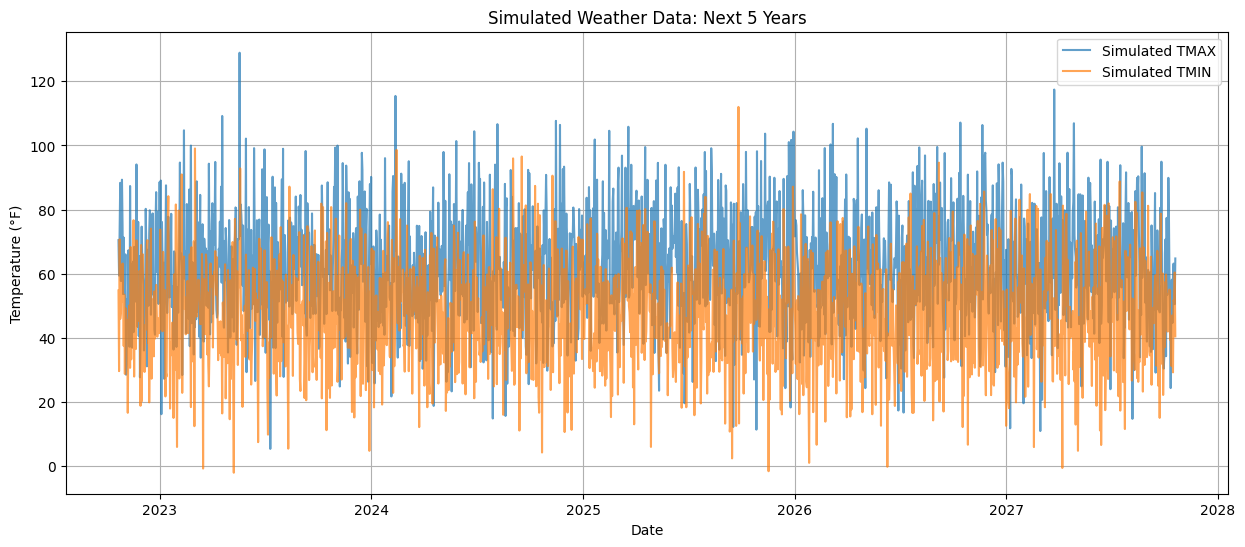

In [13]:
# Visualization (Optional)
plt.figure(figsize=(15, 6))
plt.plot(simulated_data['DATE'], simulated_data['TMAX'], label='Simulated TMAX', alpha=0.7)
plt.plot(simulated_data['DATE'], simulated_data['TMIN'], label='Simulated TMIN', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Simulated Weather Data: Next 5 Years")
plt.legend()
plt.grid()
plt.show()

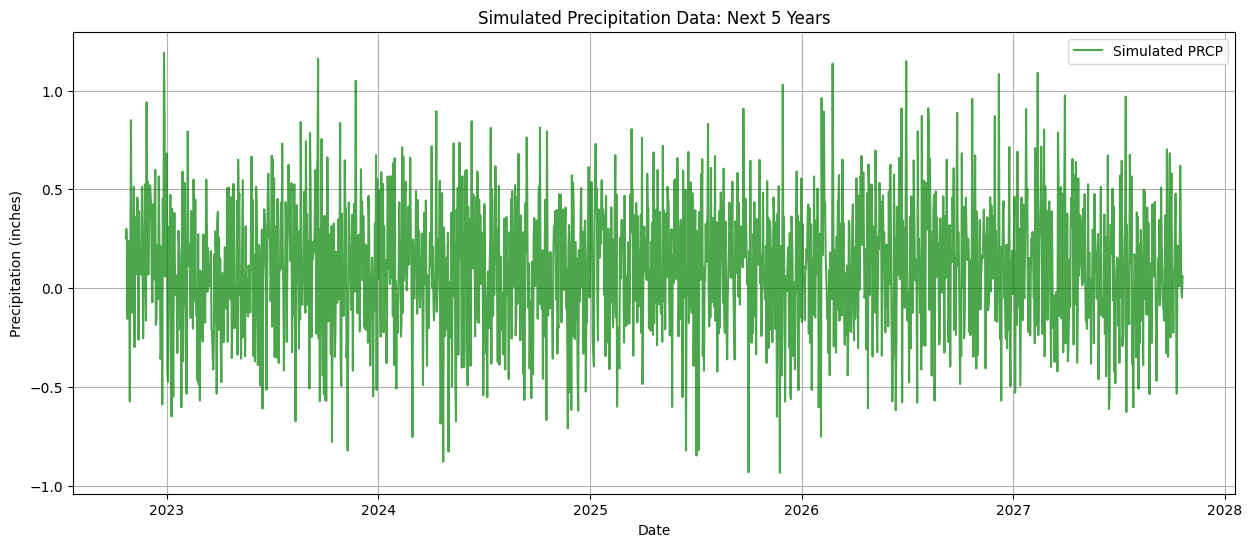

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(simulated_data['DATE'], simulated_data['PRCP'], label='Simulated PRCP', alpha=0.7, color='green')
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Simulated Precipitation Data: Next 5 Years")
plt.legend()
plt.grid()
plt.show()

In [15]:
# Calculate overall statistics for variability
tmax_std = cleaned_data['TMAX'].std()
tmin_std = cleaned_data['TMIN'].std()
prcp_std = cleaned_data['PRCP'].std()

In [16]:
# Simulation parameters
simulation_years = 10
days_per_year = 365
total_days = simulation_years * days_per_year
start_date = cleaned_data['DATE'].max() + pd.Timedelta(days=1)

In [17]:
# Generate future dates
future_dates = pd.date_range(start=start_date, periods=total_days)

# Add seasonal variation to predictions
simulated_tmax = []
simulated_tmin = []
simulated_prcp = []

np.random.seed(42)  # For reproducibility
for date in future_dates:
    month = date.month
    tmax = np.random.normal(monthly_tmax_mean[month], tmax_std)
    tmin = np.random.normal(monthly_tmin_mean[month], tmin_std)
    prcp = max(0, np.random.normal(monthly_prcp_mean[month], prcp_std))  # Precipitation cannot be negative
    simulated_tmax.append(tmax)
    simulated_tmin.append(tmin)
    simulated_prcp.append(prcp)

In [18]:
# Create a DataFrame for the simulated data
simulated_data = pd.DataFrame({
    'DATE': future_dates,
    'TMAX': simulated_tmax,
    'TMIN': simulated_tmin,
    'PRCP': simulated_prcp
})

In [19]:
# Save the simulated data
simulated_data.to_csv("simulated_weather_10_years_enhanced.csv", index=False)


In [20]:
# Preview the first few rows of simulated data
print(simulated_data.head())

        DATE       TMAX       TMIN      PRCP
0 2022-10-22  73.479018  47.941796  0.329401
1 2022-10-23  91.347668  46.367448  0.037541
2 2022-10-24  92.325840  62.811958  0.000000
3 2022-10-25  74.277217  42.603286  0.000000
4 2022-10-26  69.043665  18.798810  0.000000


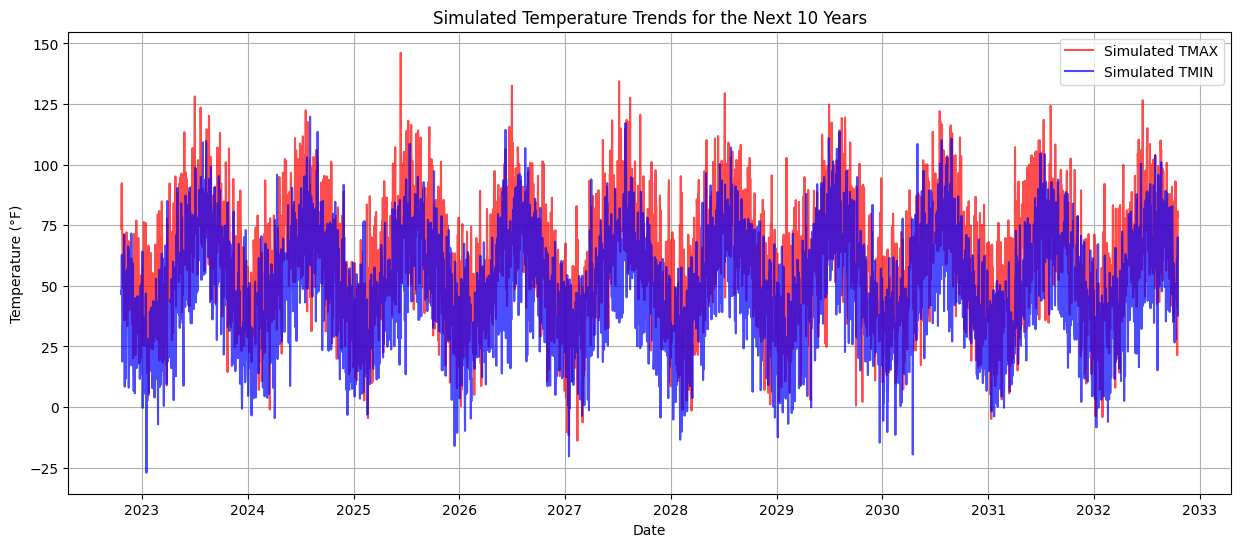

In [21]:
# Visualization: Temperature Trends
plt.figure(figsize=(15, 6))
plt.plot(simulated_data['DATE'], simulated_data['TMAX'], label='Simulated TMAX', color='red', alpha=0.7)
plt.plot(simulated_data['DATE'], simulated_data['TMIN'], label='Simulated TMIN', color='blue', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Simulated Temperature Trends for the Next 10 Years")
plt.legend()
plt.grid()
plt.show()

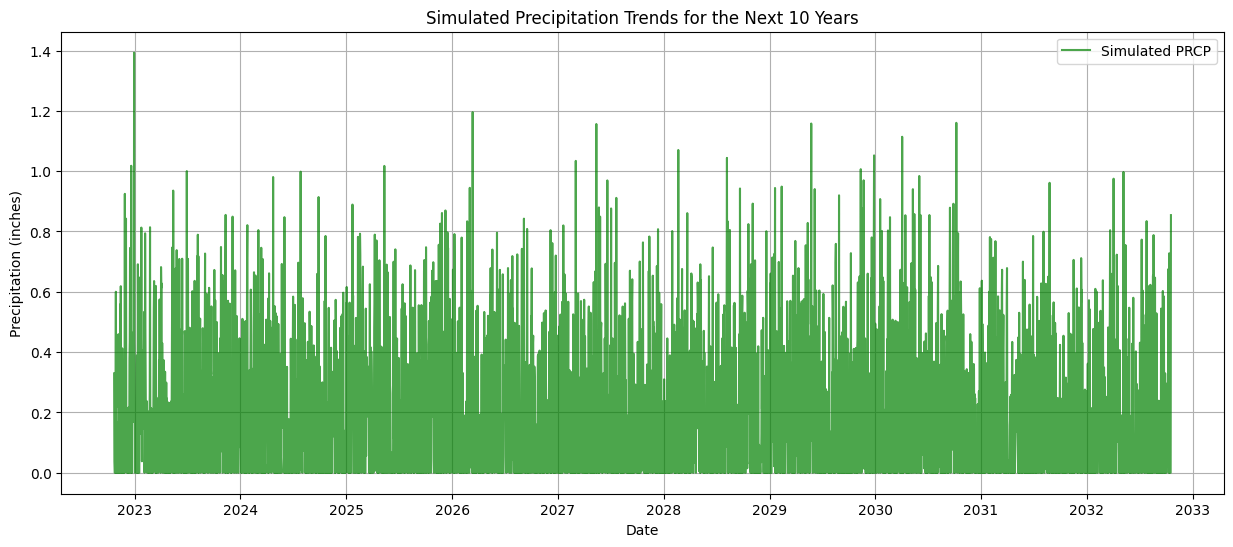

In [22]:
# Visualization: Precipitation Trends
plt.figure(figsize=(15, 6))
plt.plot(simulated_data['DATE'], simulated_data['PRCP'], label='Simulated PRCP', color='green', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Simulated Precipitation Trends for the Next 10 Years")
plt.legend()
plt.grid()
plt.show()

In [23]:
# Access the simulated data for the next 10 years
simulated_data_10_years = simulated_data

# Preview the first few rows of predictions
print(simulated_data_10_years.head())

# Calculate and print overall statistics (e.g., mean, standard deviation) for the next 10 years
print("\nOverall Statistics for the Next 10 Years:")
print(simulated_data_10_years[['TMAX', 'TMIN', 'PRCP']].describe())

# You can further analyze and visualize the data as needed, for example:
# - Plot the trends of TMAX, TMIN, and PRCP over the next 10 years
# - Calculate seasonal averages or anomalies
# - Identify extreme weather events

        DATE       TMAX       TMIN      PRCP
0 2022-10-22  73.479018  47.941796  0.329401
1 2022-10-23  91.347668  46.367448  0.037541
2 2022-10-24  92.325840  62.811958  0.000000
3 2022-10-25  74.277217  42.603286  0.000000
4 2022-10-26  69.043665  18.798810  0.000000

Overall Statistics for the Next 10 Years:
              TMAX         TMIN         PRCP
count  3650.000000  3650.000000  3650.000000
mean     61.473633    47.116864     0.202224
std      23.224782    22.321363     0.233230
min     -13.855283   -27.073511     0.000000
25%      45.405498    31.249053     0.000000
50%      61.750462    46.994086     0.124213
75%      77.746856    62.811821     0.339027
max     146.186617   119.763426     1.392671
